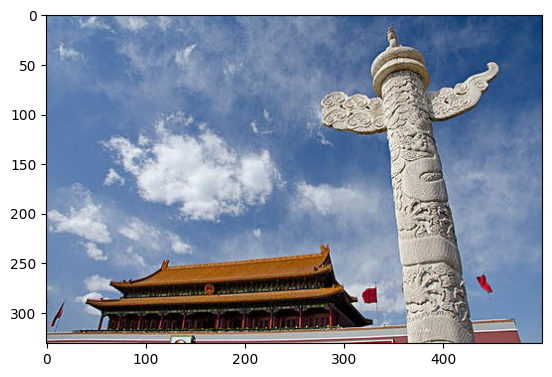

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# 读取图像
img = cv2.imread('gugong.jpg') # 文件名最好为英文
# imread 读的彩色图按照BGR像素存储、转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

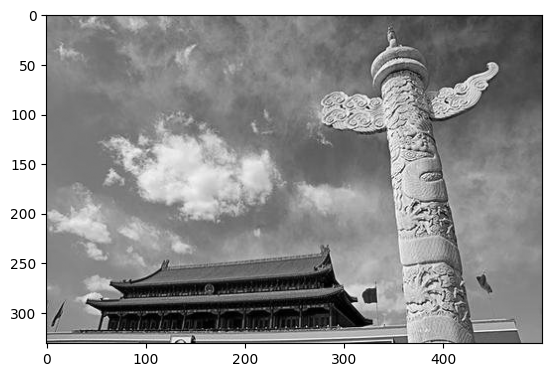

Filter shape:  (4, 4)
tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])
torch.Size([4, 1, 4, 4])


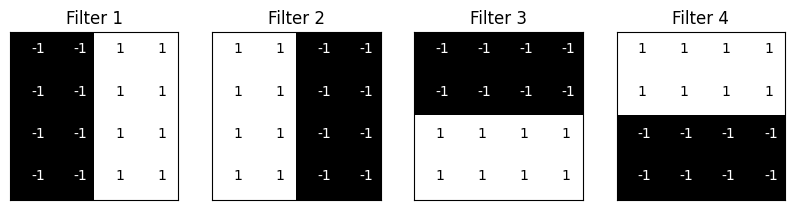

In [2]:
# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Normalise
grayImage = grayImage.astype("float32")/255
plt.imshow(grayImage, cmap='gray')
plt.show()


filter_vals = np.array([
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

# 定义滤波器 filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# 可视化filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        color='white' if filters[i][x][y]<0 else 'black')

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # 使用4个固定的fiters，初始化卷积层的权重
        k_height, k_width = weight.shape[2:] # 4, 4
        #print(k_height, k_width)
        # 这里有4个grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # 初始化卷积层权重
        self.conv.weight = torch.nn.Parameter(weight)
        # 定义池化层
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # 计算卷积层，激活层，池化层输出
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        # 返回三层输出结果
        return conv_x, activated_x, pooled_x
    
# 初始化网络，设置权重
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
print(weight)
model = Net(weight)
print(weight.shape)
# print out the layer in the network
#print(model)

[[0.5568628  0.5529412  0.54509807 ... 0.22745098 0.21568628 0.20392157]
 [0.54901963 0.54901963 0.54509807 ... 0.21568628 0.20392157 0.19215687]
 [0.5372549  0.5372549  0.5411765  ... 0.21960784 0.20392157 0.19215687]
 ...
 [0.64705884 0.6509804  0.64705884 ... 0.5803922  0.5803922  0.5803922 ]
 [0.19215687 0.2        0.20392157 ... 0.5803922  0.5803922  0.5803922 ]
 [0.4745098  0.4862745  0.49803922 ... 0.5803922  0.5803922  0.5803922 ]]
(331, 500)
torch.Size([1, 1, 331, 500])


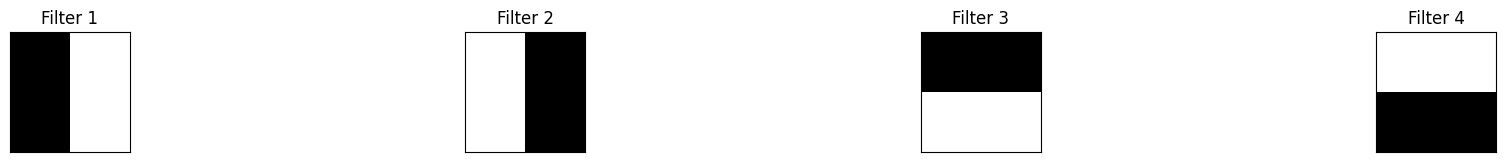

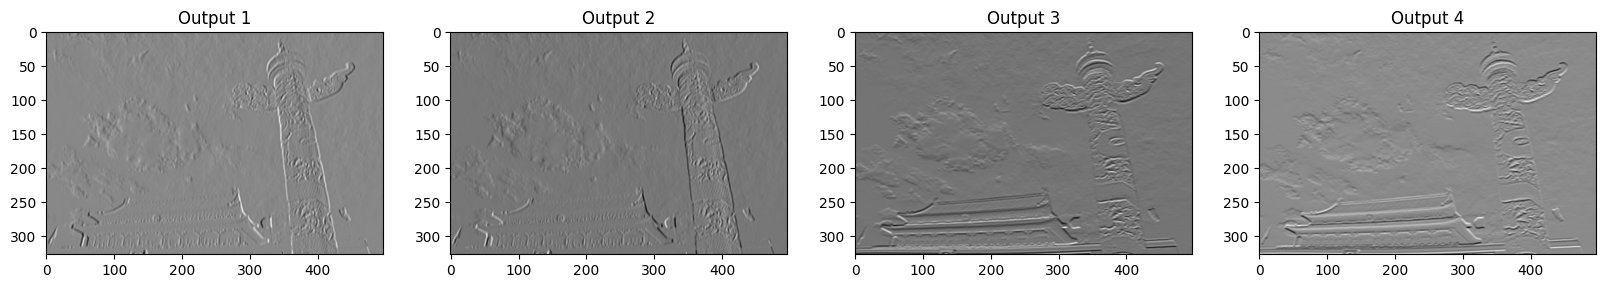

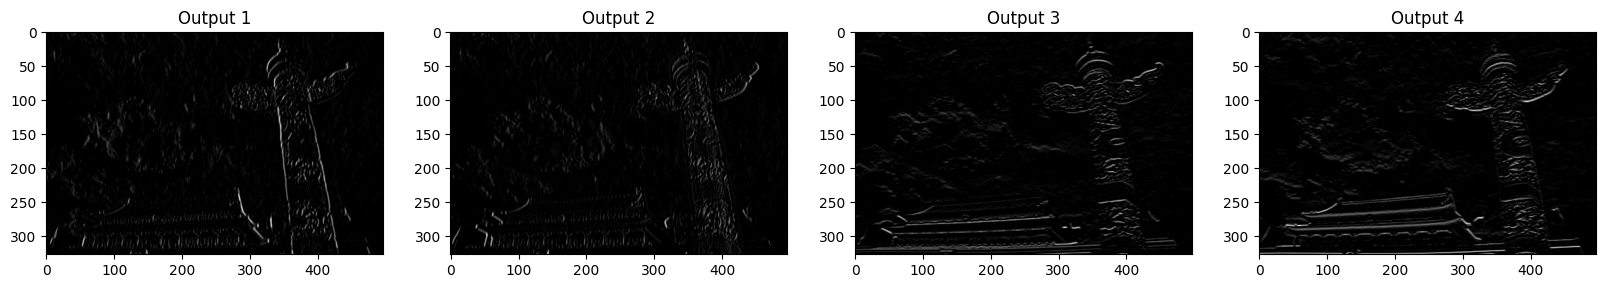

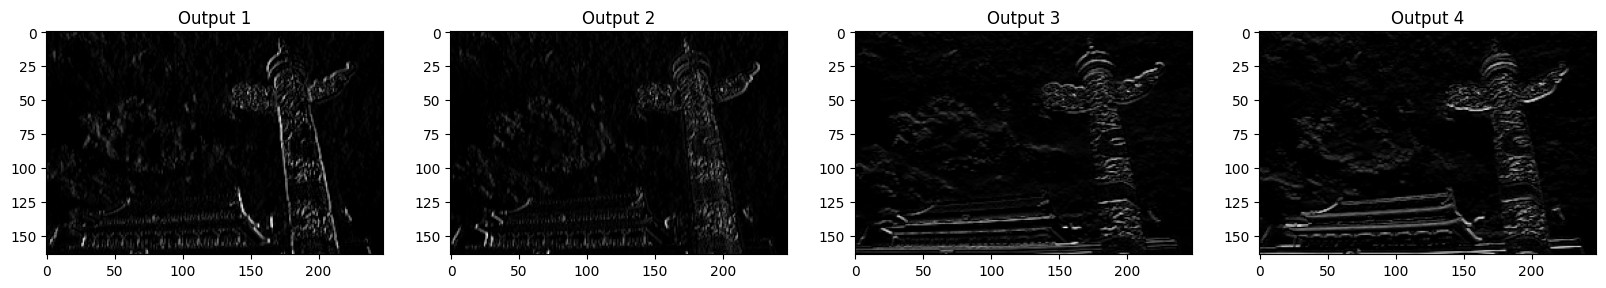

In [3]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# 将图像转换为Tensor
print(grayImage)
print(grayImage.shape)
# 使用unsqueeze进行升维度
gray_img_tensor = torch.from_numpy(grayImage).unsqueeze(0).unsqueeze(1)
print(gray_img_tensor.shape)

# 得到卷积层的3输出：conv_x, activated_x, pooled_x
conv_layer, activated_layer, pool_layer = model(gray_img_tensor)

# conv layer可视化
viz_layer(conv_layer)
# activate layer可视化
viz_layer(activated_layer)
# pool layer可视化
viz_layer(pool_layer)